<!--# STAT 207: Data Science Exploration-->
<img src="public_opinion.jpg" width="400" height="200" align="left"> <h1><b><u>Unit 1:</u> Introduction to Data and Python</b></h1>
<h2><i><u>Case Study</u> : Pew Public Opinion Data</i></h2>

We explore data from the Pew Research Center to illustrate statistical issues and data processing in Python. At this point it is not assumed that you are at all familar with Python. Instead, we will demonstrate some of the things you can do with it as a way to motivate going in more depth later. 

The Pew Research Center conducts regular national surveys on issues of national concern. We use data from the February 2017 political survey. The data are publically available from the Pew Research Center website: https://www.people-press.org/dataset/february-2017-political-survey/ Downloading requires that you register with Pew. 

<br><br><br><br><br><br><br><br><br><br>

# Summary

Using Pew Research center data we will see how to read in a comma separated file (and uncompress it if needed). Then we will investigate and visualize the data to understand the structure and gain some understanding of some of the categorical response items in the survey. 
<hr>


### Common Python Packages
<img src="coding.png" width="80" height="40" align="left"> 
**import** to load packages <br>
**pandas** : for dataframe manipulation/data represention functions <br>
**zipfile**:  for loading data  <br>
**matplotlib.pyplot**:  for visualizing data  <br>
**seaborn**:  for visualizing data  <br>
<hr>




### General Data Analysis Preliminaries
**Different ways to Represent Data in Python** <br>
<img src="datarep.png" width="80" height="40" align="left"> <br>
**data frames:** spreadsheet-like pandas objects with rows representing different observations and columns representing different variables for each observation <br>
**.head( )**: visualizing just the first few rows of the dataset <br>
<br><br>

**Getting a rough idea what kind information is in the data frame  <br>
<img src="descriptiveanalytics.png" width="80" height="40" align="left"> <br>
YOUR_DATAFRAME.head( )**: what does the data in the datframe look like <br>
**YOUR_DATAFRAME.shape**: how many rows (observations) and columns (variables) in the dateframe?<br>
**YOUR_DATAFRAME.columns.values**: what variables are in the dataframe <br>
<br>

<hr>

### Basic Descriptive Analytics for One or Two Categorical Variables
#### <u>Summary Statistics</u>: Counts
<img src="descriptiveanalytics.png" width="80" height="40" align="left"> <br>
YOUR_DATAFRAME.value_counts( )** : how many of each type of level of a SINGLE categorical variable?  <br>
**pd.crosstab()**: how many of each COMBINATION OF LEVELS from TWO OR MORE categorical variables?<br>
<br><br>

#### <u>Visualizations</u>: Barplots
<img src="descriptiveanalytics.png" width="80" height="40" align="left"> <br>
**sns.barplot ** : easy plotting for one categorical variable <br>
**YOUR_DATAFRAME.plt.bar( )** :  easy plotting for 2 or more categorical variables  <br>
<br>
<hr>
<br><br><br><br><br><br><br><br><br><br><br><br><br>

# Analysis

### Reading in the data from a csv file in a compressed folder <img src="datamanagement.png" width="80" height="40" align="left">

To get started I created an account and downloaded a compressed zip file with the data. In order to extract and view the data we need to import two Python modules:
<br><br>
+ **pandas** - Python package for reading and processing flat data files
+ **zipfile** - Python package for extracting compressed files

We'll be using **pandas** over and over throughout the course. We only need **zipfile** if we are dealing with compressed files, otherwise we don't need it.


In [1]:
# main package for data frame structures and functions
import pandas as pd 
#
# package needed to read data from a zip compressed file
import zipfile as zp  

I put the zip file in a folder called "data" parallel with the current folder for these lecture notes. Let's read the file into a zipfile object and open the ".csv" file. CSV stands for "comma separated variables". Then we can use the pandas "read_csv" function to read the file into a pandas data frame (df). The "../" part of the path says to first move up to the parent folder that contains both the "data" folder and the folder containing this Jupyter notebook.

In [2]:
# read zip file into python object
zf = zp.ZipFile('../data/Feb17-public.zip')
#
# extract data file and read into a data frame
df = pd.read_csv(zf.open('Feb17public.csv'))

Note: this example is complicated by the extraction from a zip file. If we simply had an uncompressed csv file exported from Excel, for example, we would have read the data simply as:

> df = pd.read_csv('../data/Feb17public.csv')


### Getting an idea of what's in the data

What can we find out about this data file? We can see the first few lines of data using the **head** function. Because there are so many columns, some of the middle columns are skipped. 

In [3]:
df.head()

,psraid,sample,int_date,fcall,version,attempts,refusal,ilang,cregion,state,...,ql1a,qc1,money2,money3,iphoneuse,hphoneuse,ll,cp,cellweight,weight
0,100008,Landline,21017,170207,Client changes,4,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.733333
1,100019,Landline,21217,170207,Client changes,4,Yes,English,South,North Carolina,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.500000
2,100020,Landline,21217,170207,Client changes,4,Yes,English,Northeast,New York,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.533333
3,100021,Landline,20717,170207,Initial version,1,No,English,Midwest,Minnesota,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,5.866667
4,100024,Landline,20717,170207,Initial version,1,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.700000


What are all the variables in the data frame? We can extract this information using pandas as well.

In [4]:
print(df.columns.values)

['psraid' 'sample' 'int_date' 'fcall' 'version' 'attempts' 'refusal'
 'ilang' 'cregion' 'state' 'density' 'sstate' 'form' 'stimes' 'igender'
 'irace' 'llitext0' 'susr' 'usr' 'scregion' 'qs1' 'q1' 'q1a' 'q2' 'q5af1'
 'q5bf1' 'q5cf1' 'q5df1' 'q6af2' 'q6bf2' 'q6cf2' 'q6df2' 'q10a' 'q10b'
 'q15af1' 'q15b' 'q15cf2' 'q15df1' 'q15ef1' 'q15ff1' 'q15gf2' 'q15hf2'
 'q15if2' 'q16' 'q19' 'q35' 'q36' 'q37' 'q39' 'q43' 'q44' 'q45' 'q45vb'
 'Q45VB0' 'Q45VB1' 'Q45VB2' 'q45oem1' 'q45oem2' 'q45oem3' 'q52' 'q53'
 'q54' 'q55' 'q61a' 'q61b' 'q61c' 'q61d' 'q61e' 'q62f1' 'q63f1' 'q64f2'
 'q65' 'q66' 'q68f1' 'q69f2' 'q70f1' 'q71f2' 'q74' 'q75' 'q81' 'q82'
 'q84a' 'q84bf1' 'q84cf1' 'q84df1' 'q84ef2' 'q84ff2' 'q84gf2' 'q88'
 'q90f1' 'q91f2' 'sex' 'age' 'gen5' 'educ2' 'hisp' 'adults' 'racethn'
 'racethn2' 'birth_hisp' 'citizen' 'child' 'relig' 'chr' 'born' 'attend'
 'q92' 'q92a' 'income' 'reg' 'party' 'partyln' 'partysum' 'partyideo'
 'q93' 'q94' 'ideo' 'hh1' 'hh3' 'ql1' 'ql1a' 'qc1' 'money2' 'money3'
 'iphoneus

How many rows and columns are there in the data frame? the **shape** attribute gives us this information.

In [5]:
df.shape

(1503, 130)

Looking through the variable names we see a variable called 'sample' and the first few values are 'Landline'. We can get counts of the different values for this variable using the pandas function **.value_counts( )**

In [6]:
df['sample'].value_counts()

Cell        1126
Landline     377
Name: sample, dtype: int64

In [7]:
df['sample'].shape

(1503,)

The row labels for this spreadsheet structure are in the "index" accessible as follows:

In [8]:
df.index

RangeIndex(start=0, stop=1503, step=1)

Similarly, the column labels are accessed as:

In [9]:
df.columns

Index(['psraid', 'sample', 'int_date', 'fcall', 'version', 'attempts',
       'refusal', 'ilang', 'cregion', 'state',
       ...
       'ql1a', 'qc1', 'money2', 'money3', 'iphoneuse', 'hphoneuse', 'll', 'cp',
       'cellweight', 'weight'],
      dtype='object', length=130)

### Visualizing categorical variables using barplots

In order to visualize the data we import two graphics modules that will be used frequently throughout the course:

+ **matplotlib.pyplot** - Basic python graphics functions
+ **seaborn** - Enhanced graphics functions with additional styles and capabilities


In [10]:
import matplotlib.pyplot as plt   # basic graphing package
import seaborn as sns; sns.set()  # enhanced graphing package

In [11]:
counts = df['sample'].value_counts()
display(counts.shape, counts)

(2,)

Cell        1126
Landline     377
Name: sample, dtype: int64

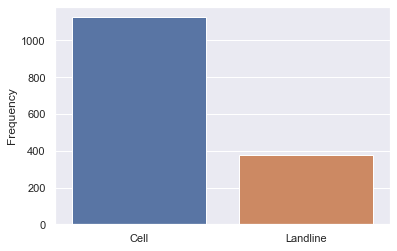

In [12]:
sns.barplot(x=counts.index, y=counts)
plt.ylabel('Frequency')
plt.show()

What is the regional distribution of respondants to the survey? There's a variable called 'cregion'. Let's investigate.

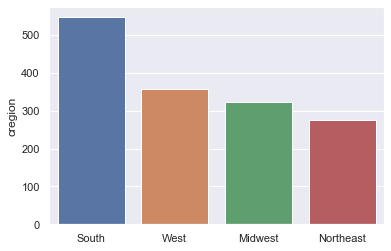

In [13]:
temp = df['cregion'].value_counts()
sns.barplot(x=temp.index, y=temp)
plt.show()

How do the relative frequencies of cell phone and landline respondents vary across regions? Let's look at the **cross-tabulation** of the two variables. 

In [14]:
pd.crosstab(df['cregion'], df['sample'])

sample,Cell,Landline
cregion,,
Midwest,244,80
Northeast,195,80
South,415,132
West,272,85


Those are the raw counts. Let's convert to row proportions to better compare across regions. Note that "index" here refers to rows. We devide each row by the row total to normalize it. If we wanted to normalize by columns we'd pass "columns" instead of "index" for the normalization.

In [15]:
pd.crosstab(df['cregion'], df['sample'], normalize='index')

sample,Cell,Landline
cregion,,
Midwest,0.753086,0.246914
Northeast,0.709091,0.290909
South,0.758684,0.241316
West,0.761905,0.238095


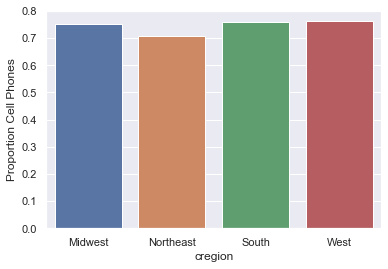

In [16]:
# graph the normalized crosstabs
temp = pd.crosstab(df['cregion'], df['sample'], normalize='index')
sns.barplot(x=temp.index, y="Cell", data=temp)
plt.ylabel("Proportion Cell Phones")
plt.show()

Why did this work? Here are the row (index) and column names for the crosstab object we just created. 

In [17]:
display(temp.index, temp.columns)

Index(['Midwest', 'Northeast', 'South', 'West'], dtype='object', name='cregion')

Index(['Cell', 'Landline'], dtype='object', name='sample')

We only needed the first column - "Cell", which is equivalent to 

    temp['Cell'] 

as follows.

In [18]:
temp['Cell']

cregion
Midwest      0.753086
Northeast    0.709091
South        0.758684
West         0.761905
Name: Cell, dtype: float64

#### Side-by-side bar plots

Here's a way, using pandas, to see the proportions of both cell phones and landline across regions.

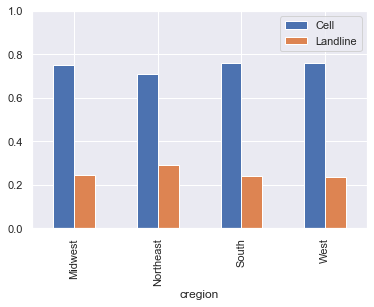

In [19]:
temp.plot.bar()
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

**Remark on order of variables:** If we had reversed the order of variables in the crosstab, the resulting data frame is transposed. Rows become columns and vice versa. We would then get a different presentation, showing the regional distribution within cell phone and landline users.

In [20]:
temp2 = pd.crosstab(df['sample'], df['cregion'], normalize='index')
temp2

cregion,Midwest,Northeast,South,West
sample,,,,
Cell,0.216696,0.173179,0.368561,0.241563
Landline,0.212202,0.212202,0.350133,0.225464


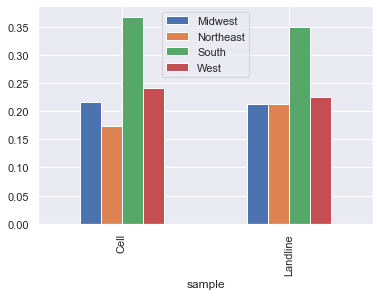

In [21]:
temp2.plot.bar()
plt.legend(loc="upper center")
plt.show()

### Let's explore other variables!

Many of the columns in this data set are labeled by question number. To know what those are we have to look up the questions in a summary file included in the download. Here are two of the questions asked:

+ q1 - Do you approve or disapprove of the way Donald Trump is handling his job as President?
+ q52 - All in all, would you favor or oppose building a wall along the entire border with Mexico?

Use the methods we have seen so far to investigate the responses to these questions, and how they relate to each other or to geographic regions.

### Caution 

To properly interpret results from the data we need to understand better how they were collected. Then we can better discuss the following questions:

+ Based on how they were sampled, are the data representative of the general adult population?

+ Are associations we find in the data causal? or are they merely associations?


---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign